<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6.5px>
                    <b> Inclass - Lab File 2 <br>(Week 1 - Day 5)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [150]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 6]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sma
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

from scipy import stats

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

#### Load the first dataset and check the first two observations

In [151]:
# load your data
# type your code here
df_wine = pd.read_csv('winequality-white.csv', sep = ';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [152]:
# check data types of variables
# type your code here

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [153]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

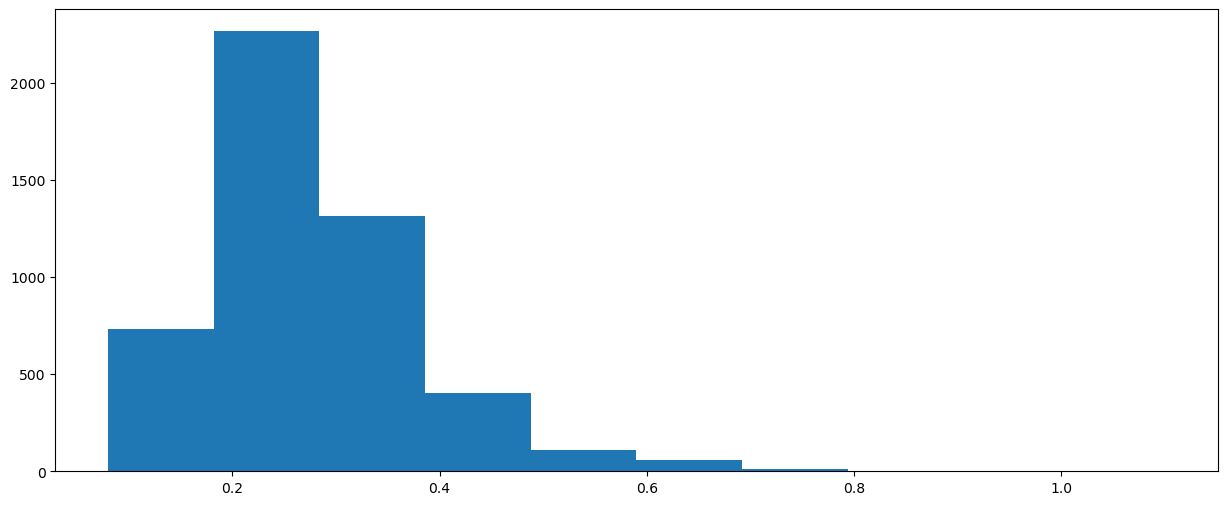

In [154]:
# type your code here
# plot histogram
plt.hist(df_wine['volatile acidity'])
plt. show ()

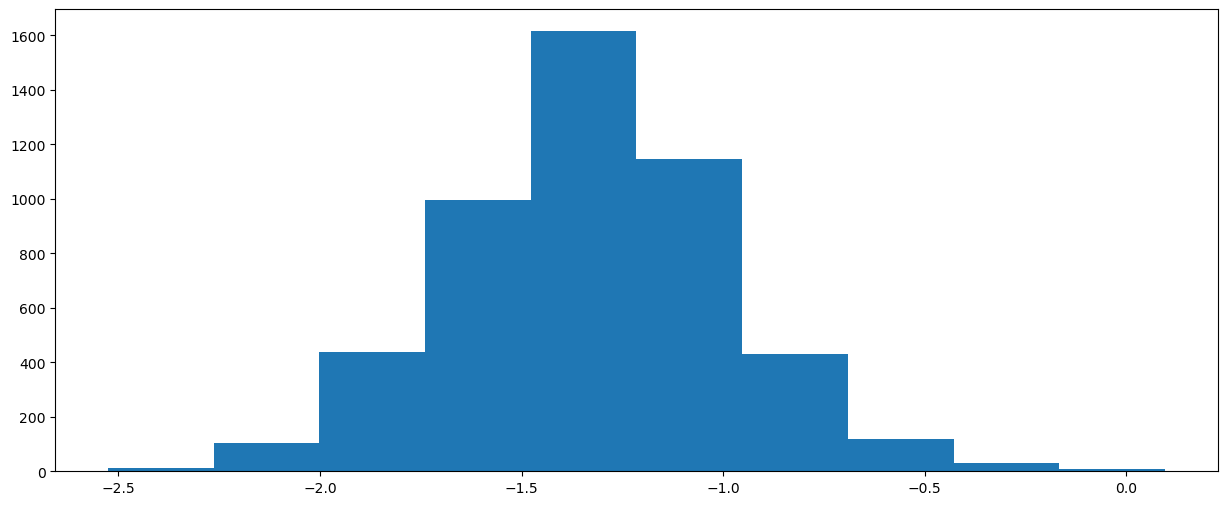

In [155]:
df_wine['volatile acidity'] = np.log(df_wine['volatile acidity'])
plt.hist (df_wine['volatile acidity'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [156]:
# type your code here

In [157]:
df_wine['residual sugar'].skew()

1.0770937564240868

<Axes: xlabel='residual sugar', ylabel='Density'>

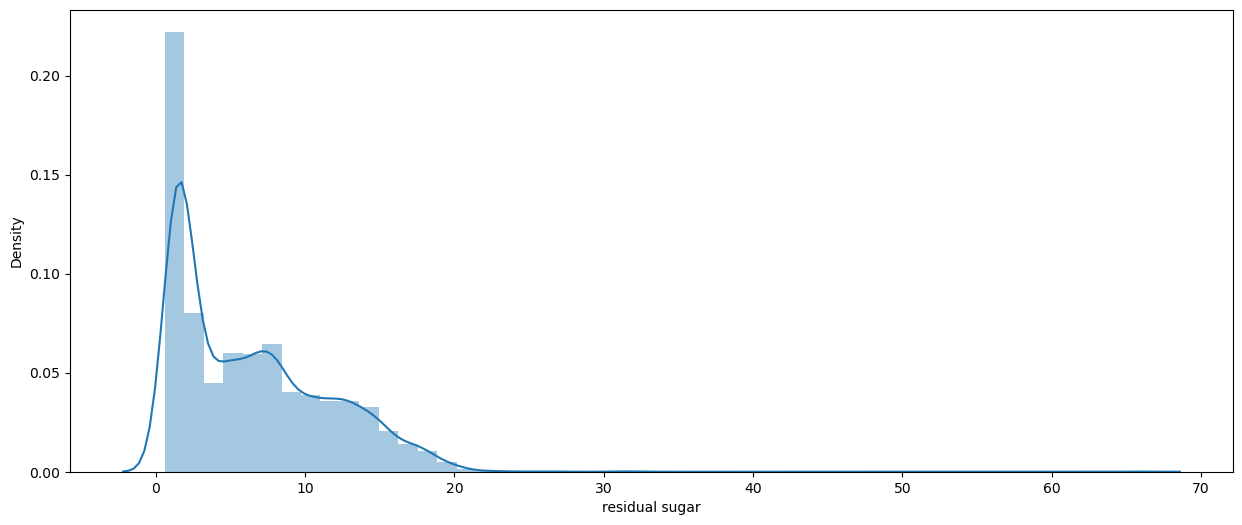

In [158]:
sns.distplot(df_wine['residual sugar'])

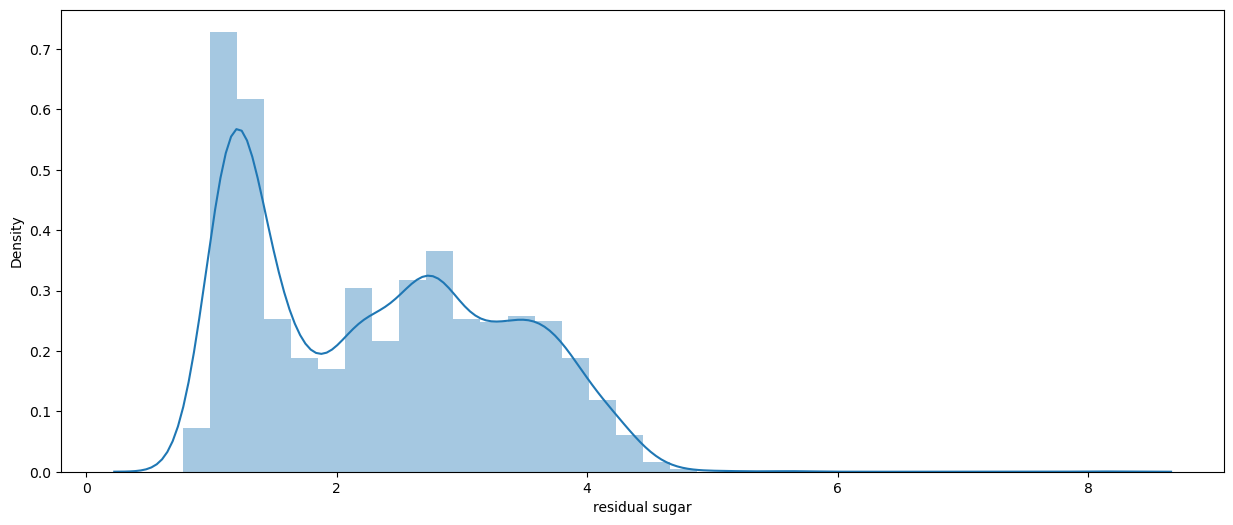

Skew:  0.31620347950253724


In [159]:
df_wine['residual sugar'] = np.sqrt(df_wine['residual sugar'])
sns.distplot(df_wine['residual sugar'])
plt.show()
print('Skew: ',df_wine['residual sugar'].skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
# type your code here
df_wine.std()

fixed acidity           0.843868
volatile acidity        0.338158
citric acid             0.121020
residual sugar          1.003519
chlorides               0.021848
free sulfur dioxide    17.007137
total sulfur dioxide   42.498065
density                 0.002991
pH                      0.151001
sulphates               0.114126
alcohol                 1.230621
quality                 0.885639
dtype: float64

In [161]:
#density contributes very less

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# type your code here

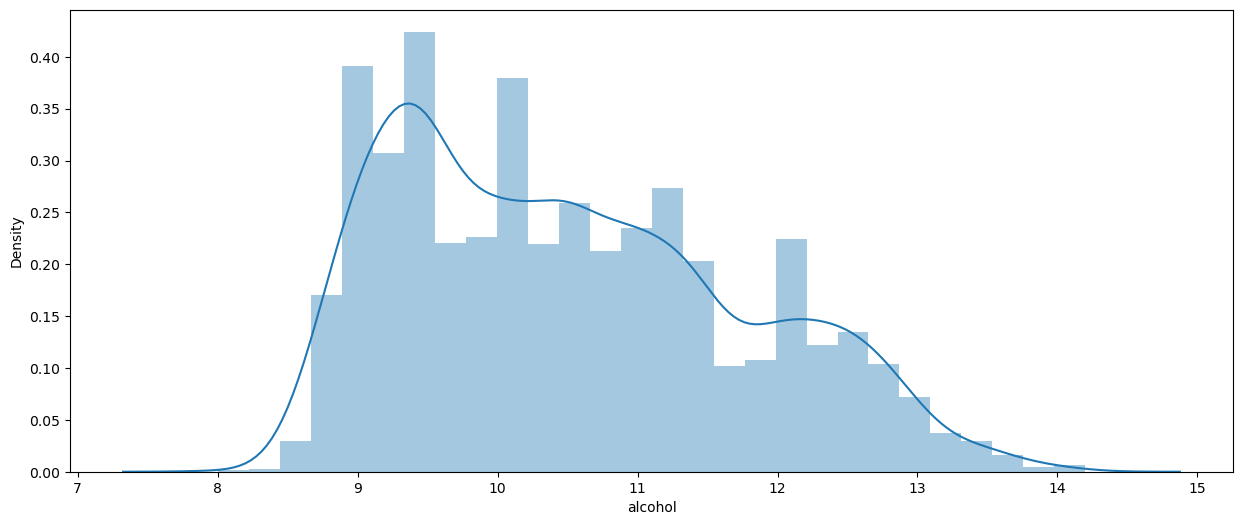

In [163]:
sns.distplot(df_wine['alcohol']);

In [164]:
print(df_wine['alcohol'].skew())
print(np.log(df_wine['alcohol']).skew())
print(np.sqrt(df_wine['alcohol']).skew())

0.4873419932161276
0.310134622964236
0.39789094275901415


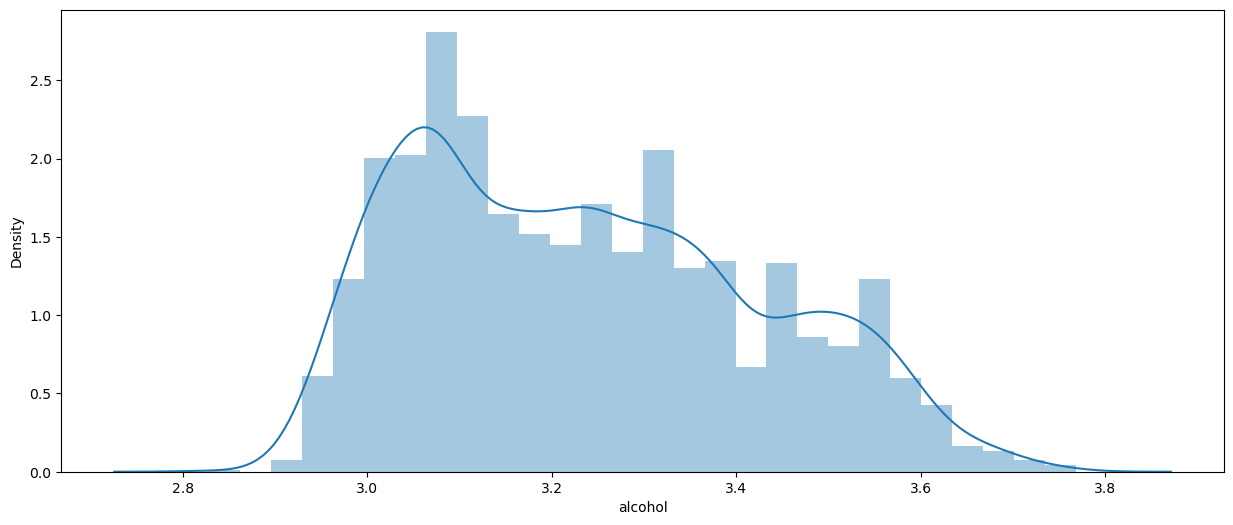

In [165]:
sns.distplot(np.sqrt(df_wine['alcohol']));

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
# type your code here
# no scaling donot affect the prediction in any way

X = df_wine.drop('quality',axis = 1)
y = df_wine['quality']

newx = sm.add_constant(X)

model = sm.OLS(y, newx).fit()
print('R-squared : ',model.rsquared)
print('Adj. R-squared : ',model.rsquared_adj)

sc = StandardScaler()
newx['pH'] = sc.fit_transform(pd.DataFrame(newx['pH']))

model = sm.OLS(y, newx).fit()
print("\nValues after Scaling")
print('R-squared : ',model.rsquared)
print('Adj. R-squared : ',model.rsquared_adj)

R-squared :  0.2841990420333006
Adj. R-squared :  0.28258753762527067

Values after Scaling
R-squared :  0.2841990420333006
Adj. R-squared :  0.28258753762527067


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
vif = pd.DataFrame()
df_numeric = df_wine.select_dtypes(include = [np.number])
df_numeric = df_numeric.drop('quality',axis = 1)
vif['Features'] = df_numeric.columns
vif['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
print(vif)

                Features         VIF
0          fixed acidity   93.007431
1       volatile acidity   19.076697
2            citric acid    9.945602
3         residual sugar    9.484136
4              chlorides    6.487831
5    free sulfur dioxide    9.292679
6   total sulfur dioxide   25.547603
7                density 1095.749487
8                     pH  612.101508
9              sulphates   20.562048
10               alcohol  116.933246


In [168]:
# type your code here
# regularisation
#remove densit and build the model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here

In [170]:
model = sm.OLS(y,newx).fit()

residuals = model.resid
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:06:08   Log-Likelihood:                -5535.8
No. Observations:                4898   AIC:                         1.110e+04
Df Residuals:                    4886   BIC:                         1.117e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  101.2283 

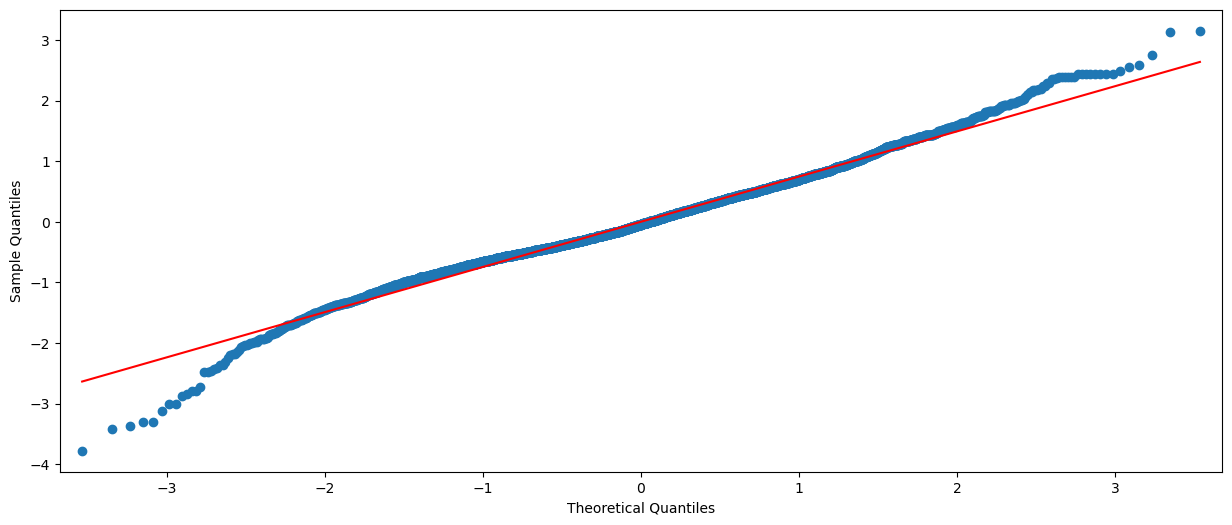

In [171]:
qqplot(model.resid, line = 'r');

In [172]:
#from above graph it is clear that resid donot follow normality

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
# type your code here

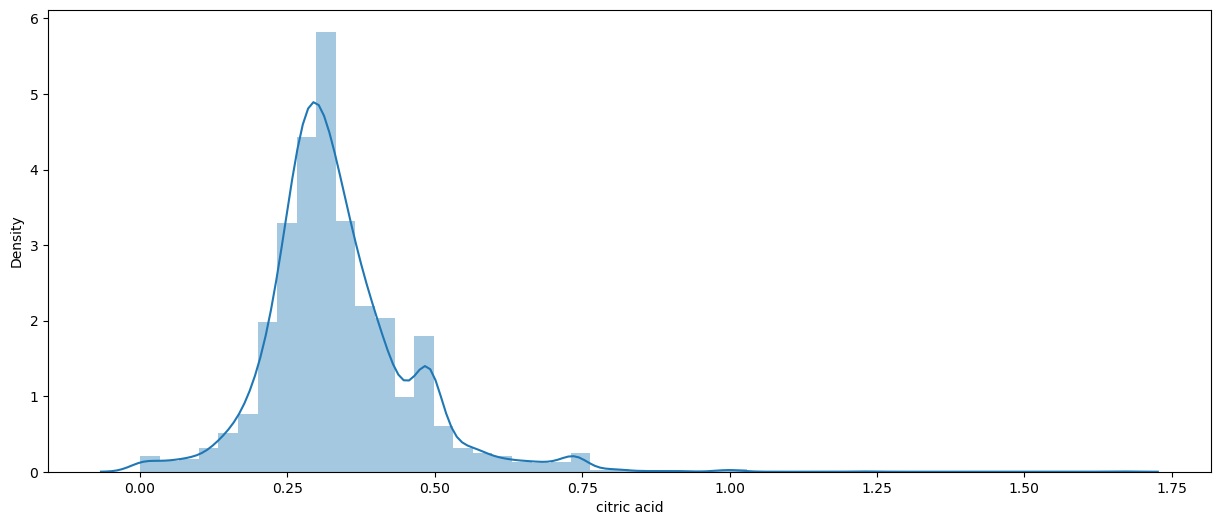

In [174]:
sns.distplot(df_wine['citric acid']);

In [175]:
df_wine['citric acid'].skew()  # skewness of citric acid variable

1.2819203981671066

In [176]:
model = sm.OLS(y, newx).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:06:09   Log-Likelihood:                -5535.8
No. Observations:                4898   AIC:                         1.110e+04
Df Residuals:                    4886   BIC:                         1.117e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  101.2283 

In [177]:
X = df_wine.drop("quality",axis=1)
y = df_wine ['quality']
newx = sm.add_constant (X)

model = sm.OLS(y,newx).fit()


In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:06:09   Log-Likelihood:                -5535.8
No. Observations:                4898   AIC:                         1.110e+04
Df Residuals:                    4886   BIC:                         1.117e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   99.7077     14.359      6.944      0.000      71.558     127.857
fixed acidity            0.0230      0.019      1.238      0.216      -0.013       0.060
volatile acidity        -0.6011      0.034    -17.700      0.000      -0.668      -0.535
citric acid              0.0520      0.095      0.545      0.586      -0.135       0.239
residual sugar           0.3216      0.029     11.025      0.000       0.264       0.379
chlorides               -0.4978      0.542     -0.919      0.358      -1.560       0.564
free sulfur dioxide      0.0038      0.001      4.471      0.000       0.002       0.005
total sulfur dioxide    -0.0004      0.000     -1.131      0.258      -0.001       0.000
density               -100.6055     14.573     -6.904      0.000    -129.175     -72.036
pH                       0.4769      0.096      4.973      0.000       0.289       0.665
sulphates                0.5675      0.099      5.725      0.000       0.373       0.762
alcohol                  0.2472      0.021     12.020      0.000       0.207       0.288
==============================================================================
Omnibus:                      117.752   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.860
Skew:                           0.086   Prob(JB):                     3.73e-57
Kurtosis:                       4.115   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [179]:
# type your code here

In [180]:
sm.stats.diagnostic.linear_rainbow(model)

(1.0706710491991616, 0.04578778499061896)

In [181]:
residual = model.resid

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [182]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector


In [183]:
X = df_wine.drop("quality",axis=1)
y = df_wine ['quality']

In [184]:
#creating model
newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

model.rsquared

0.2841990420333006

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr, k_features=5, forward=True, scoring="r2")

In [186]:
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [187]:
sfs_forward.k_feature_names_   

('fixed acidity',
 'volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'alcohol')

In [188]:
sfs_forward.k_score_   
# here score is on the basis of whatever you give in the parameter, 
# (one cell above- scoreing = r2, hence this is r2 scores)

0.2686719962212442

In [189]:
X = df_wine[['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol']]
y = df_wine ['quality']

In [190]:
newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

model.rsquared

0.27303154269167673

In [191]:
#small increase in rsquare score is found

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [192]:
# type your code here

In [193]:
X = df_wine.drop("quality",axis=1)
y = df_wine ['quality']

#creating model
newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

model.rsquared

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr, k_features=5, forward=False, scoring="r2")
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(5, 5), scoring='r2')

In [194]:
sfs_forward.k_feature_names_   

('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')

In [195]:
X = df_wine[['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']]
y = df_wine ['quality']

In [196]:
newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

model.rsquared

0.2752099411614325

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [197]:
# type your code here
# add constant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [198]:
# type your code here
X = df_wine.drop("quality",axis=1)
y = df_wine ['quality']


In [199]:
newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

model.rsquared

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr, k_features='best', forward=True, scoring="r2")
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 11),
                          scoring='r2')

In [200]:
print(sfs_forward.k_feature_names_   )

('fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol')


In [201]:
X = df_wine[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = df_wine ['quality']

newx = sm.add_constant (X)
model = sm.OLS(y,newx).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     233.7
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:06:12   Log-Likelihood:                -5561.6
No. Observations:                4898   AIC:                         1.114e+04
Df Residuals:                    4889   BIC:                         1.120e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5858    

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [214]:
# type your code here
# initiate linear regression model to use in feature selection
X = df_wine.drop('quality',axis = 1)
y = df_wine['quality']

newx = sm.add_constant(X)

lr = LinearRegression ()
lr_backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')
# fit the backward elimination on training data using fit()
sfs_backward = lr_backward.fit(X_train, y_train)

In [215]:
sfs_backward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 11), scoring='r2')

In [216]:
print(sfs_backward.k_feature_names_)
print(sfs_backward.k_score_)

('volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
0.2729366135063909


In [218]:
newdata = newx.loc[:,sfs_backward.k_feature_names_]
newdata = sm.add_constant(newdata)
sm.OLS(y, newdata).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:12:04   Log-Likelihood:                -5537.4
No. Observations:                4898   AIC:                         1.109e+04
Df Residuals:                    4889   BIC:                         1.115e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  89.7828     11.073      8.108      0.000      68.075     111.491
volatile acidity       -0.6158      0.033    -18.939      0.000      -0.680      -0.552
residual sugar          0.3006      0.024     12.664      0.000       0.254       0.347
chlorides              -0.5693      0.535     -1.065      0.287      -1.617       0.479
free sulfur dioxide     0.0032      0.001      4.731      0.000       0.002       0.005
density               -90.3319     11.098     -8.140      0.000    -112.088     -68.575
pH                      0.3920      0.076      5.190      0.000       0.244       0.540
sulphates               0.5441      0.098      5.559      0.000       0.352       0.736
alcohol                 0.2627      0.018     14.913      0.000       0.228       0.297
==============================================================================
Omnibus:                      113.949   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.524
Skew:                           0.088   Prob(JB):                     2.94e-54
Kurtosis:                       4.085   Cond. No.                     5.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [219]:
# type your code here
# type your code here
# initiate linear regression model to use in feature selection
X = df_wine.drop('quality',axis = 1)
y = df_wine['quality']

newx = sm.add_constant(X)

lr = LinearRegression ()
lr_backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')
# fit the backward elimination on training data using fit()
sfs_backward = lr_backward.fit(X_train, y_train)

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [205]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [206]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [207]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [208]:
# type your code here